In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import time

sns.set()
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#import csv and make time data type string
df  = pd.read_csv("/content/drive/My Drive/Lucky Parking/Data/Parking_Citations_After_July_1_2015.csv", dtype = {'Issue time':str})
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,4361370075,2019/09/17 12:00:00 AM,817,NaN,NaN,LA,NaN,MERC,PA,RD,1324 84TH PL W,00551,55.0,80.69BS,NO PARK/STREET CLEAN,73,6.471017e+06,1.808559e+06
1,4361370064,2019/09/17 12:00:00 AM,811,VM48,NaN,CA,NaN,BUIC,PA,GN,1000 85TH ST W,00551,55.0,88.13B+,METER EXP.,63,6.473192e+06,1.808298e+06
2,4361370053,2019/09/17 12:00:00 AM,809,NaN,NaN,CA,NaN,TOYT,PA,GY,1000 85TH ST W,00551,55.0,80.69BS,NO PARK/STREET CLEAN,73,6.473192e+06,1.808298e+06
3,4361370042,2019/09/17 12:00:00 AM,805,NaN,NaN,CA,NaN,NISS,PA,BK,8021 VERMONT AVE,00551,55.0,80.69BS,NO PARK/STREET CLEAN,73,6.473164e+06,1.810388e+06
4,4361370031,2019/09/17 12:00:00 AM,727,NaN,NaN,CA,NaN,HOND,PA,GY,1473 45TH ST W,00551,55.0,22500E,BLOCKING DRIVEWAY,68,6.469917e+06,1.823537e+06


#Analsysis of Parking Citations All 

In [ ]:
#Have a look at the numericals of the data
df.describe()


,Marked Time,VIN,Agency,Latitude,Longitude
count,281350.000000,0.0,8.706402e+06,8.706410e+06,8.706410e+06
mean,1054.397949,NaN,5.201589e+01,5.626516e+06,1.620590e+06
std,228.109367,NaN,9.294210e+00,2.140816e+06,5.896023e+05
min,1.000000,NaN,1.000000e+00,9.999900e+04,9.999900e+04
25%,909.000000,NaN,5.100000e+01,6.423748e+06,1.826133e+06
50%,1036.000000,NaN,5.400000e+01,6.453452e+06,1.842363e+06
75%,1200.000000,NaN,5.500000e+01,6.475619e+06,1.858228e+06
max,2400.000000,NaN,9.700000e+01,6.514332e+06,1.942669e+06


In [ ]:
#check each data type
df.dtypes

Ticket number             object
Issue Date                object
Issue time                object
Meter Id                  object
Marked Time              float64
RP State Plate            object
VIN                      float64
Make                      object
Body Style                object
Color                     object
Location                  object
Route                     object
Agency                   float64
Violation code            object
Violation Description     object
Fine amount               object
Latitude                 float64
Longitude                float64
dtype: object

In [ ]:
#inspect how many null values each column might have
df.apply(lambda x: sum(x.isna()),axis = 0)

Ticket number                  0
Issue Date                     0
Issue time                  2167
Meter Id                 6520291
Marked Time              8425062
RP State Plate               375
VIN                      8706412
Make                        7690
Body Style                  8478
Color                       3536
Location                     346
Route                      63715
Agency                        10
Violation code                 0
Violation Description        890
Fine amount                 5919
Latitude                       2
Longitude                      2
dtype: int64

Feature Engineering

In [ ]:
#change the datatypes 
df['Fine amount'] = pd.to_numeric(df['Fine amount'], errors="coerce") #change string to float
df['Issue Date'] = pd.to_datetime(df['Issue Date']) #change string to datetime
df['Time'] = pd.to_datetime(df['Issue time'], format= '%H%M', errors= "coerce").dt.time #change time in new column

In [ ]:
#split data into metered and non metered  
temp = {True:'Meter', False : 'No Meter'}
df['Meter']= (df['Meter Id'].notna()).map(temp)
 
#create an hour feature
df['Hour'] = df['Time'].apply(lambda x: x.hour) 

#create day of the week
weekdays=('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
df['Weekday'] = df['Issue Date'].apply(lambda x : weekdays[x.weekday()])

In [ ]:
df['Year'] = df['Issue Date'].apply(lambda x : x.year)
months = ('','Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'Sep', 'Oct', 'Nov', 'Dec')
df['Month'] = df['Issue Date'].apply(lambda x : months[x.month])


In [ ]:
#remove columns with too many none entries. 
del df['VIN']
del df['Marked Time']
#remove the columns that I don't think are neccessary for this analysis
df= df.drop(["Ticket number","Issue time",	"Meter Id",	"RP State Plate",	"Make",	"Body Style",	"Color","Route",	"Agency",	"Latitude",	"Longitude"], axis = 1)
#fill null times i hour column with zero (12 am or hour 0)
df['Hour'].fillna(0, inplace = True)
df.head()

,Issue Date,Location,Violation code,Violation Description,Fine amount,Time,Meter,Hour,Weekday,Year,Month
0,2019-09-17,1324 84TH PL W,80.69BS,NO PARK/STREET CLEAN,73.0,08:17:00,No Meter,8.0,Tuesday,2019,Sep
1,2019-09-17,1000 85TH ST W,88.13B+,METER EXP.,63.0,08:11:00,Meter,8.0,Tuesday,2019,Sep
2,2019-09-17,1000 85TH ST W,80.69BS,NO PARK/STREET CLEAN,73.0,08:09:00,No Meter,8.0,Tuesday,2019,Sep
3,2019-09-17,8021 VERMONT AVE,80.69BS,NO PARK/STREET CLEAN,73.0,08:05:00,No Meter,8.0,Tuesday,2019,Sep
4,2019-09-17,1473 45TH ST W,22500E,BLOCKING DRIVEWAY,68.0,07:27:00,No Meter,7.0,Tuesday,2019,Sep


Text(0.5, 1, 'Number of Parking Citations per Metered Parking')

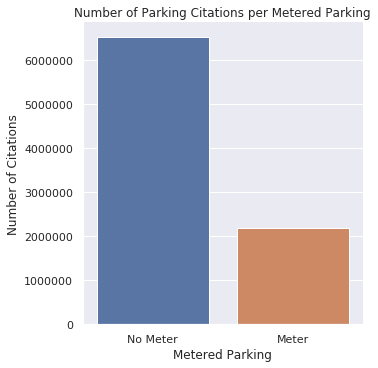

In [ ]:
sns.catplot('Meter', data=df, kind = 'count')
plt.ylabel('Number of Citations')
plt.xlabel('Metered Parking')
plt.title('Number of Parking Citations per Metered Parking')

Text(0.5, 1, 'Number of Parking Citations per Hour')

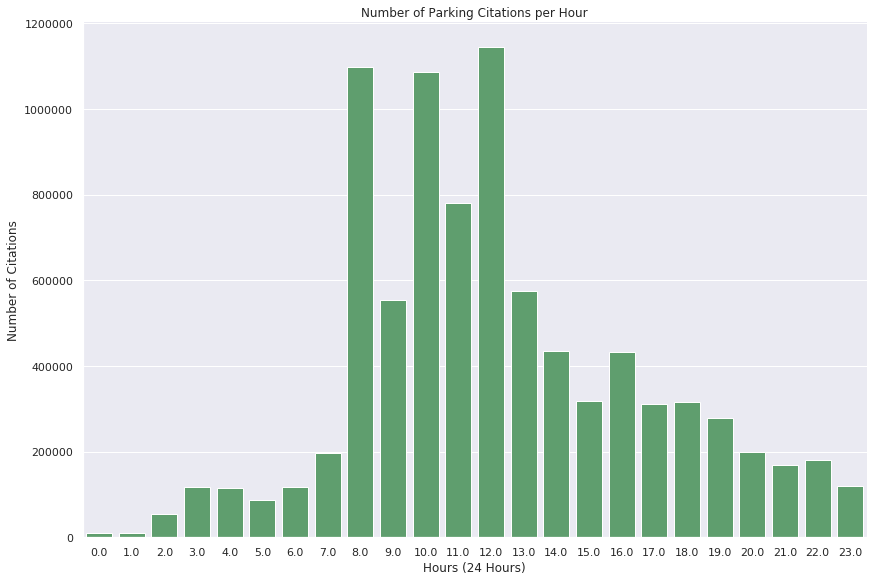

In [ ]:
sns.catplot('Hour', data=df, kind = 'count', color = 'g', height=8, aspect=12/8)
plt.ylabel('Number of Citations')
plt.xlabel('Hours (24 Hours)')
plt.title('Number of Parking Citations per Hour')

Text(0.5, 1, 'Number of Metered Parking Citations per Hour')

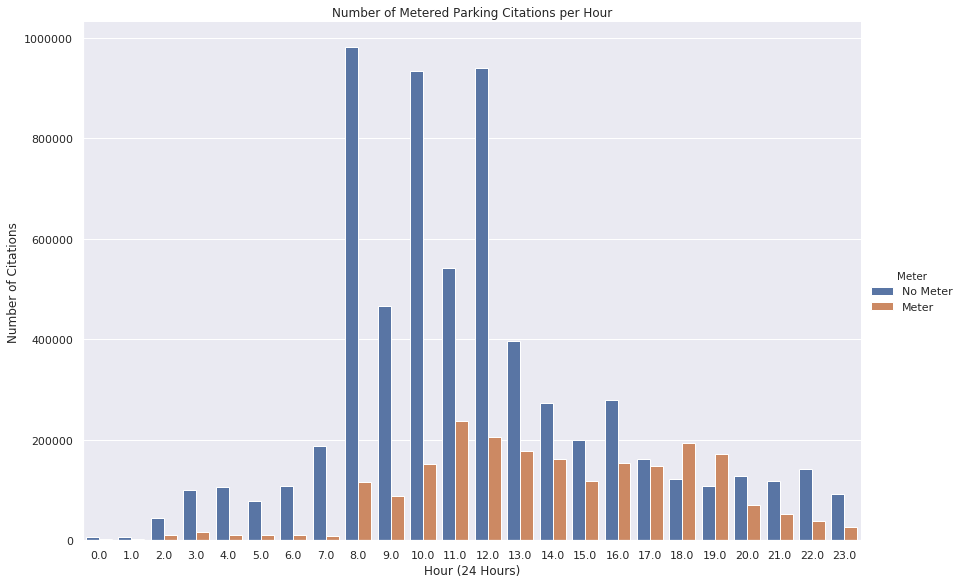

In [ ]:
sns.catplot('Hour', data = df, kind = 'count', hue = 'Meter', height=8, aspect=12/8)
plt.ylabel('Number of Citations')
plt.xlabel('Hour (24 Hours)')
plt.title('Number of Metered Parking Citations per Hour')

Text(0.5, 1, 'Number of Parking Citations per Weekday')

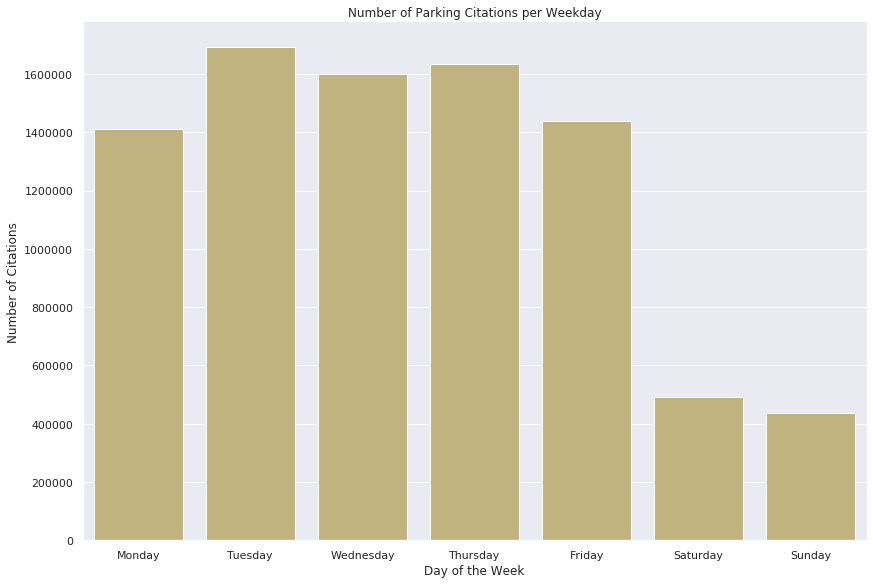

In [ ]:
sns.catplot('Weekday', data=df, kind = 'count', color ='y', order = weekdays, height=8, aspect=12/8)
plt.ylabel('Number of Citations')
plt.xlabel('Day of the Week')
plt.title('Number of Parking Citations per Weekday')

Text(-17.82499999999999, 0.5, 'Citations')

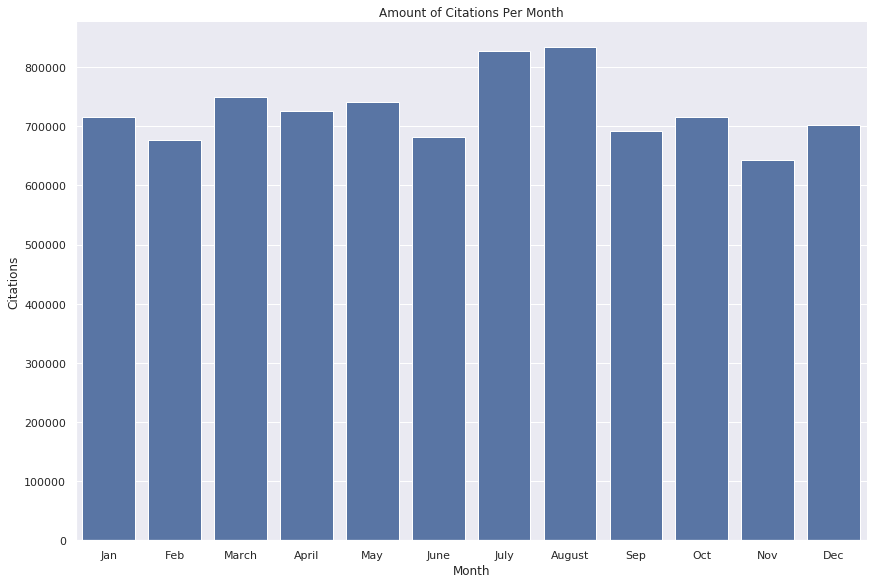

In [ ]:
sns.catplot('Month', data=df, kind = 'count', color = 'b', height=8, aspect=12/8, order= months[1:])
plt.title("Amount of Citations Per Month")
plt.ylabel('Citations')

Text(0.5, 1, 'Number of Parking Citations per Fine')

<Figure size 720x288 with 0 Axes>

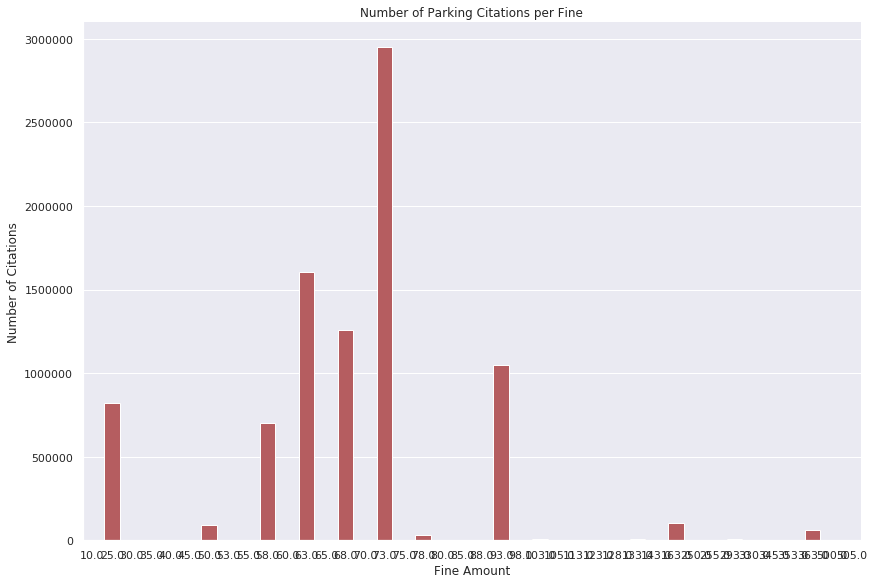

In [ ]:
plt.figure(figsize = (10,4))
sns.catplot('Fine amount', data = df, kind = 'count' ,color = 'r', height=8, aspect=12/8)
plt.ylabel('Number of Citations')
plt.xlabel('Fine Amount')
plt.title('Number of Parking Citations per Fine')

Text(0.5, 1.0, 'LA Parking Citations Timeline')

<Figure size 1800x720 with 0 Axes>

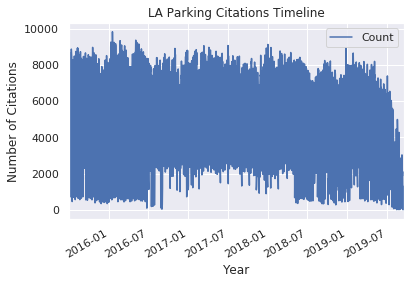

In [ ]:
date = df.groupby('Issue Date')['Issue Date'].count().reset_index(name = 'Count')
plt.figure(figsize=(25,10))
date.plot(x='Issue Date', y = 'Count')
plt.ylabel('Number of Citations')
plt.xlabel('Year')
plt.title('LA Parking Citations Timeline')

In [ ]:
df['Violation code'].describe()

count     8706412
unique        299
top       80.69BS
freq      2484729
Name: Violation code, dtype: object

In [ ]:
df['Violation Description'].describe()

count                  8705522
unique                     782
top       NO PARK/STREET CLEAN
freq                   2558744
Name: Violation Description, dtype: object

Text(0.5, 1.0, 'Top 10 Parking Violations')

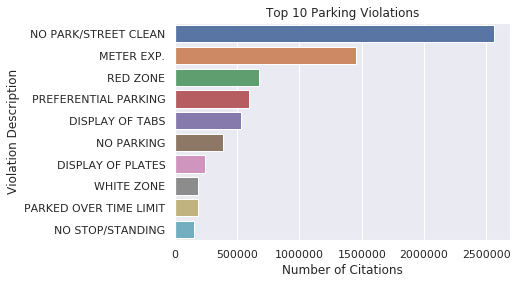

In [ ]:
violations_top10 = df['Violation Description'].value_counts(ascending=False).index[:10]
sns.countplot(y="Violation Description", data=df, order= violations_top10)
plt.ylabel('Violation Description')
plt.xlabel('Number of Citations')
plt.title('Top 10 Parking Violations')

Text(0.5, 1.0, 'Top 10 Locations Where Citations Happen')

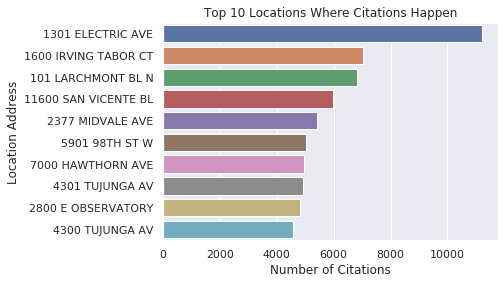

In [ ]:
locations_top10 = df['Location'].value_counts(ascending=False).index[:10]
sns.countplot(y="Location", data=df, order=locations_top10)
plt.ylabel('Location Address')
plt.xlabel('Number of Citations')
plt.title('Top 10 Locations Where Citations Happen')

In [ ]:
top_violations_df = df[df['Violation Description'].isin(violations_top10)]
top_violations_df.head()

,Issue Date,Location,Violation code,Violation Description,Fine amount,Time,Meter,Hour,Weekday,Year,Month
0,2019-09-17,1324 84TH PL W,80.69BS,NO PARK/STREET CLEAN,73.0,08:17:00,No Meter,8.0,Tuesday,2019,Sep
1,2019-09-17,1000 85TH ST W,88.13B+,METER EXP.,63.0,08:11:00,Meter,8.0,Tuesday,2019,Sep
2,2019-09-17,1000 85TH ST W,80.69BS,NO PARK/STREET CLEAN,73.0,08:09:00,No Meter,8.0,Tuesday,2019,Sep
3,2019-09-17,8021 VERMONT AVE,80.69BS,NO PARK/STREET CLEAN,73.0,08:05:00,No Meter,8.0,Tuesday,2019,Sep
6,2019-09-17,1601 EASTLAKE AV,88.13B+,METER EXP.,63.0,17:50:00,Meter,17.0,Tuesday,2019,Sep


Text(0.5, 1.0, 'LA Parking Citations Timeline per Violation Description')

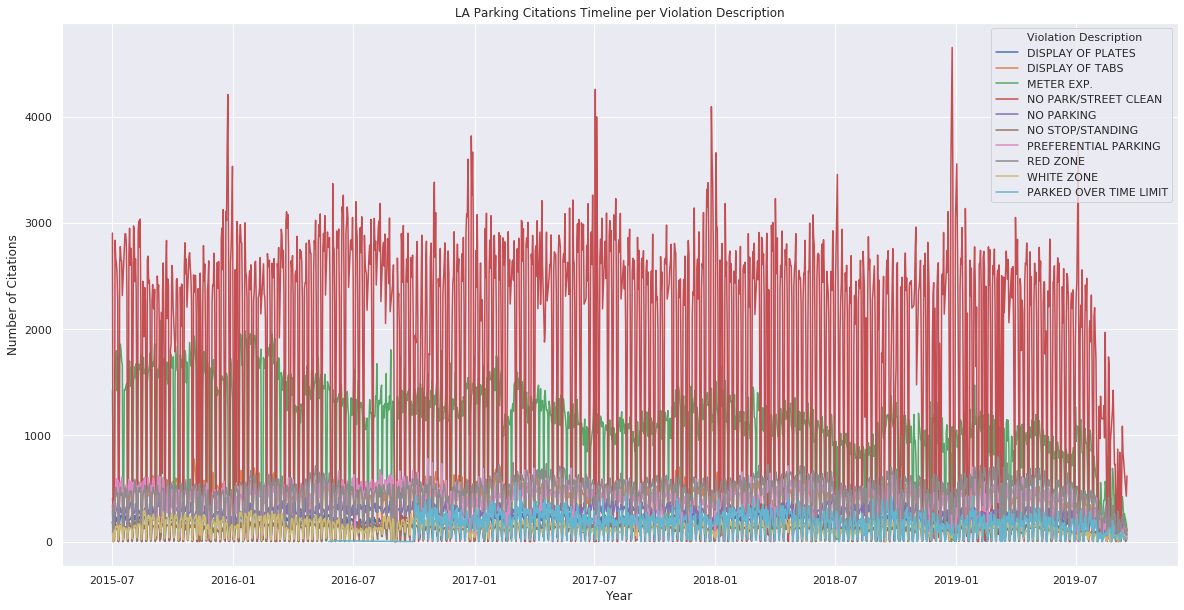

In [ ]:
top_10_date = top_violations_df.groupby(['Issue Date', 'Violation Description'])['Issue Date'].count().reset_index(name = 'Count')
plt.figure(figsize=(20,10))
sns.lineplot(x='Issue Date', y= 'Count', hue= 'Violation Description', data=top_10_date)
plt.ylabel('Number of Citations')
plt.xlabel('Year')
plt.title('LA Parking Citations Timeline per Violation Description')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


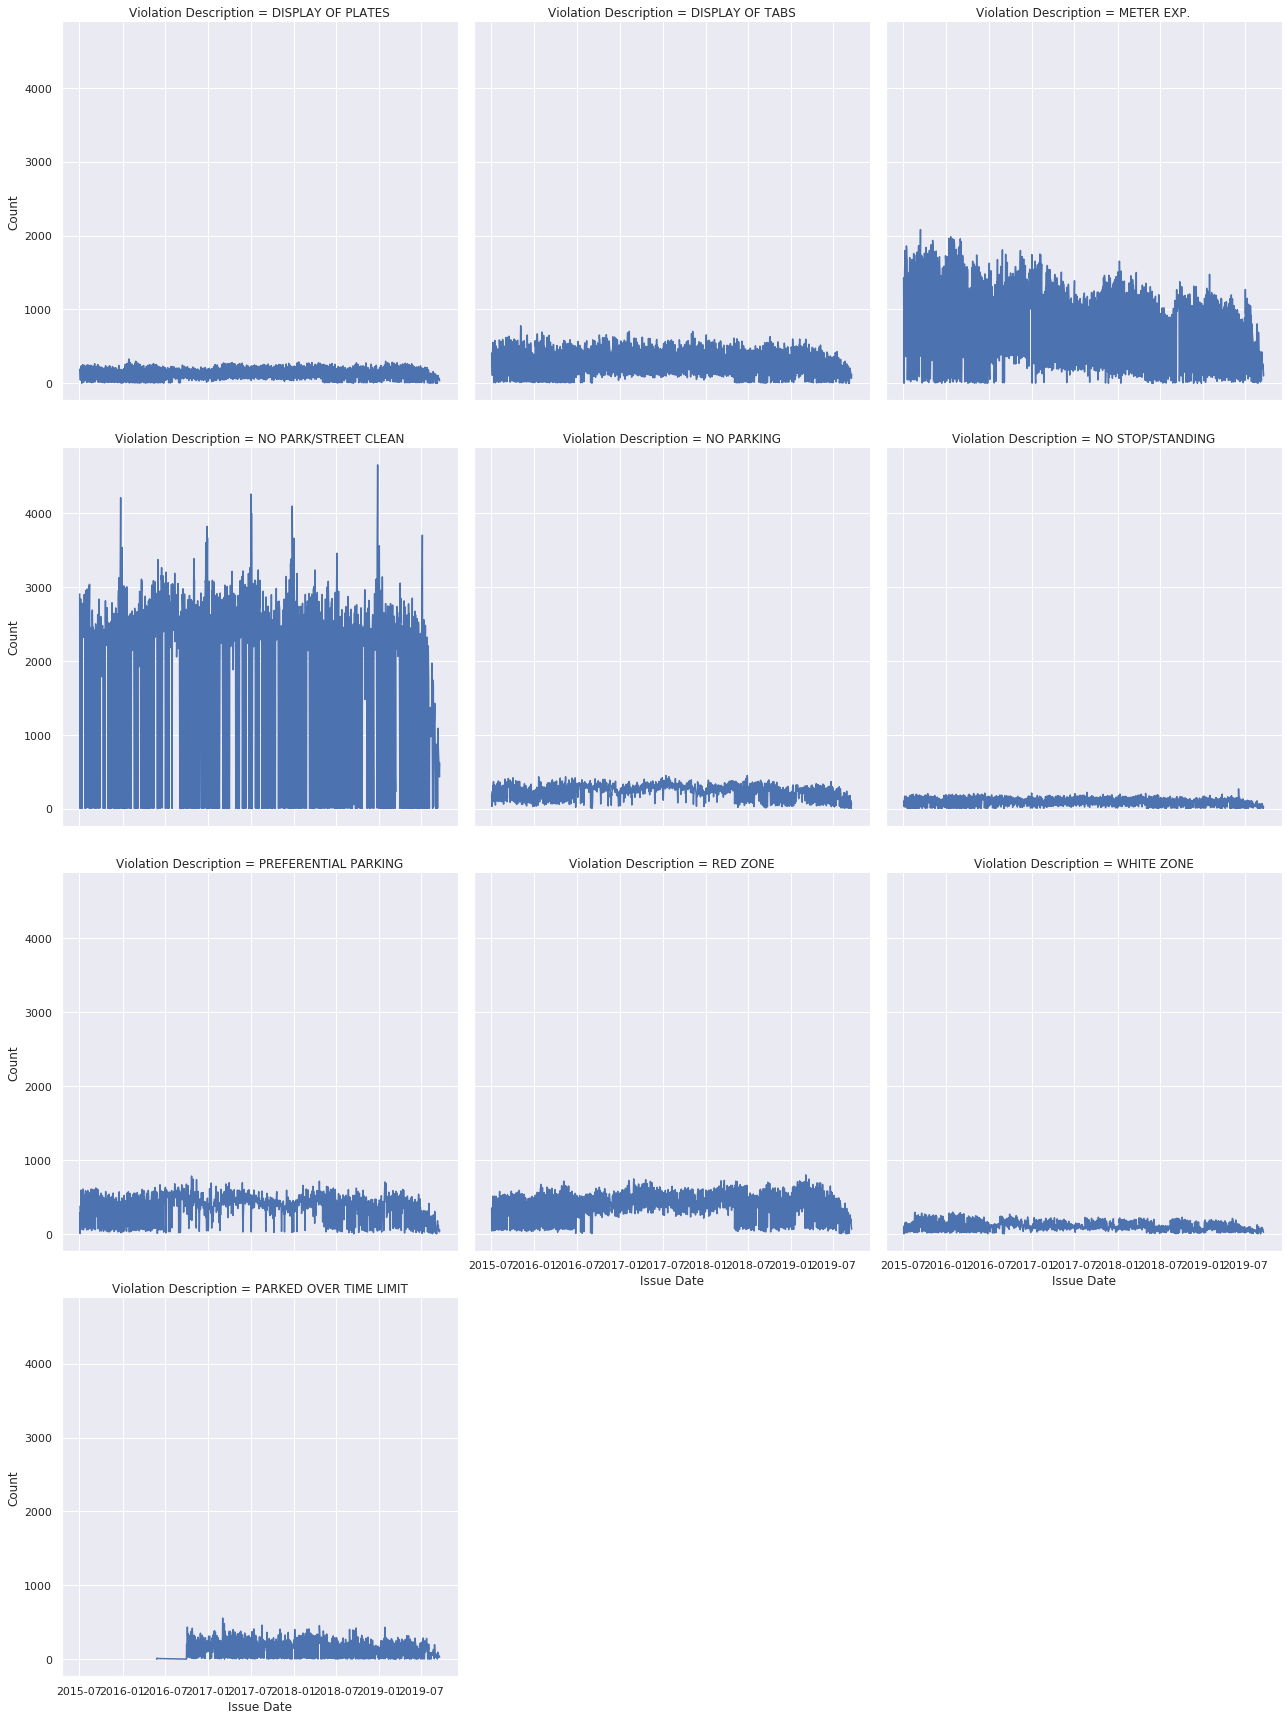

In [ ]:
grid = sns.FacetGrid(data= top_10_date, col= 'Violation Description', col_wrap= 3, size=6)
grid.map(sns.lineplot, "Issue Date", "Count")

In [ ]:
top_10_hour = top_violations_df.groupby(['Hour', 'Weekday','Violation Description'])['Hour'].count().reset_index(name = 'Count')
top_10_hour.head()

,Hour,Weekday,Violation Description,Count
0,0.0,Friday,DISPLAY OF PLATES,63
1,0.0,Friday,DISPLAY OF TABS,71
2,0.0,Friday,NO PARK/STREET CLEAN,15
3,0.0,Friday,NO PARKING,229
4,0.0,Friday,NO STOP/STANDING,4


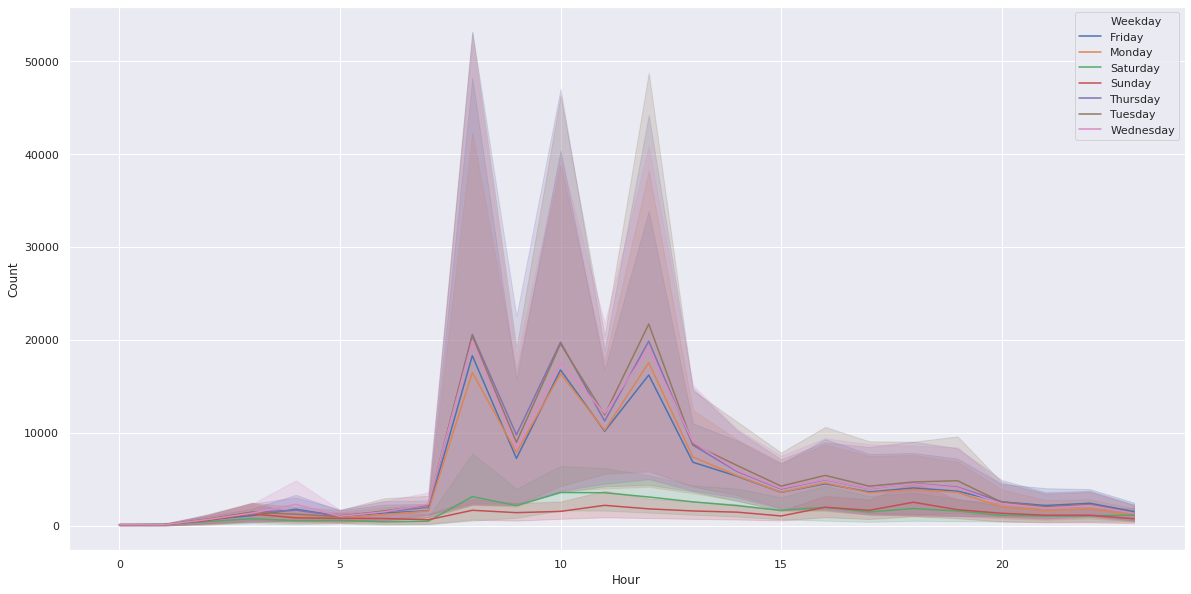

In [ ]:

plt.figure(figsize=(20,10))
sns.lineplot(x='Hour', y= 'Count', hue= 'Weekday', data=top_10_hour)

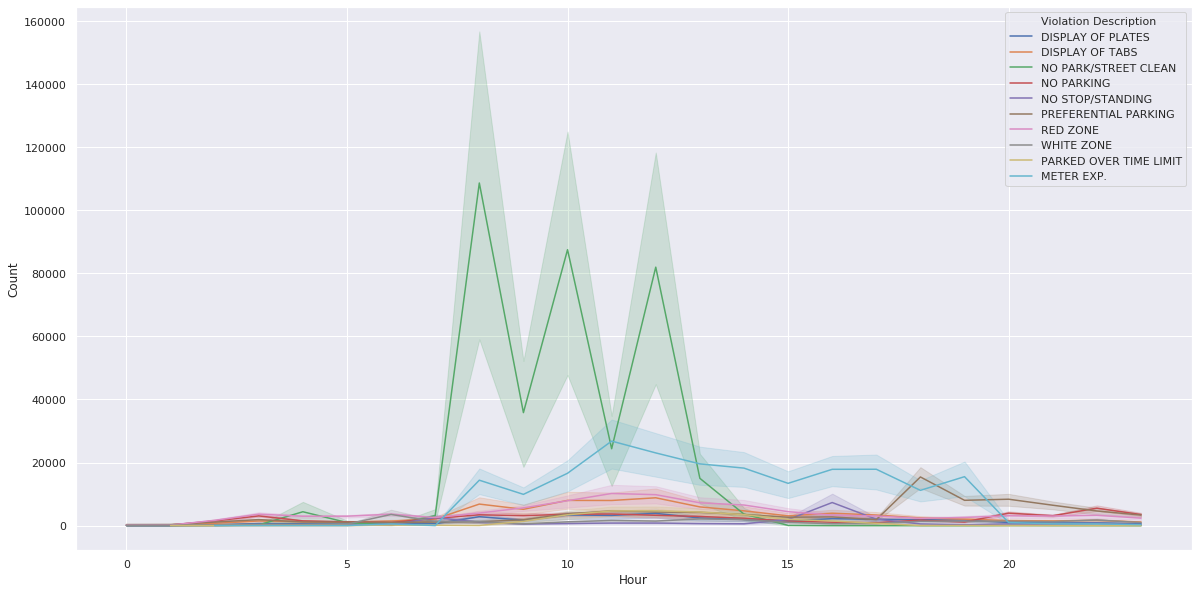

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Hour', y= 'Count', hue= 'Violation Description', data=top_10_hour)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


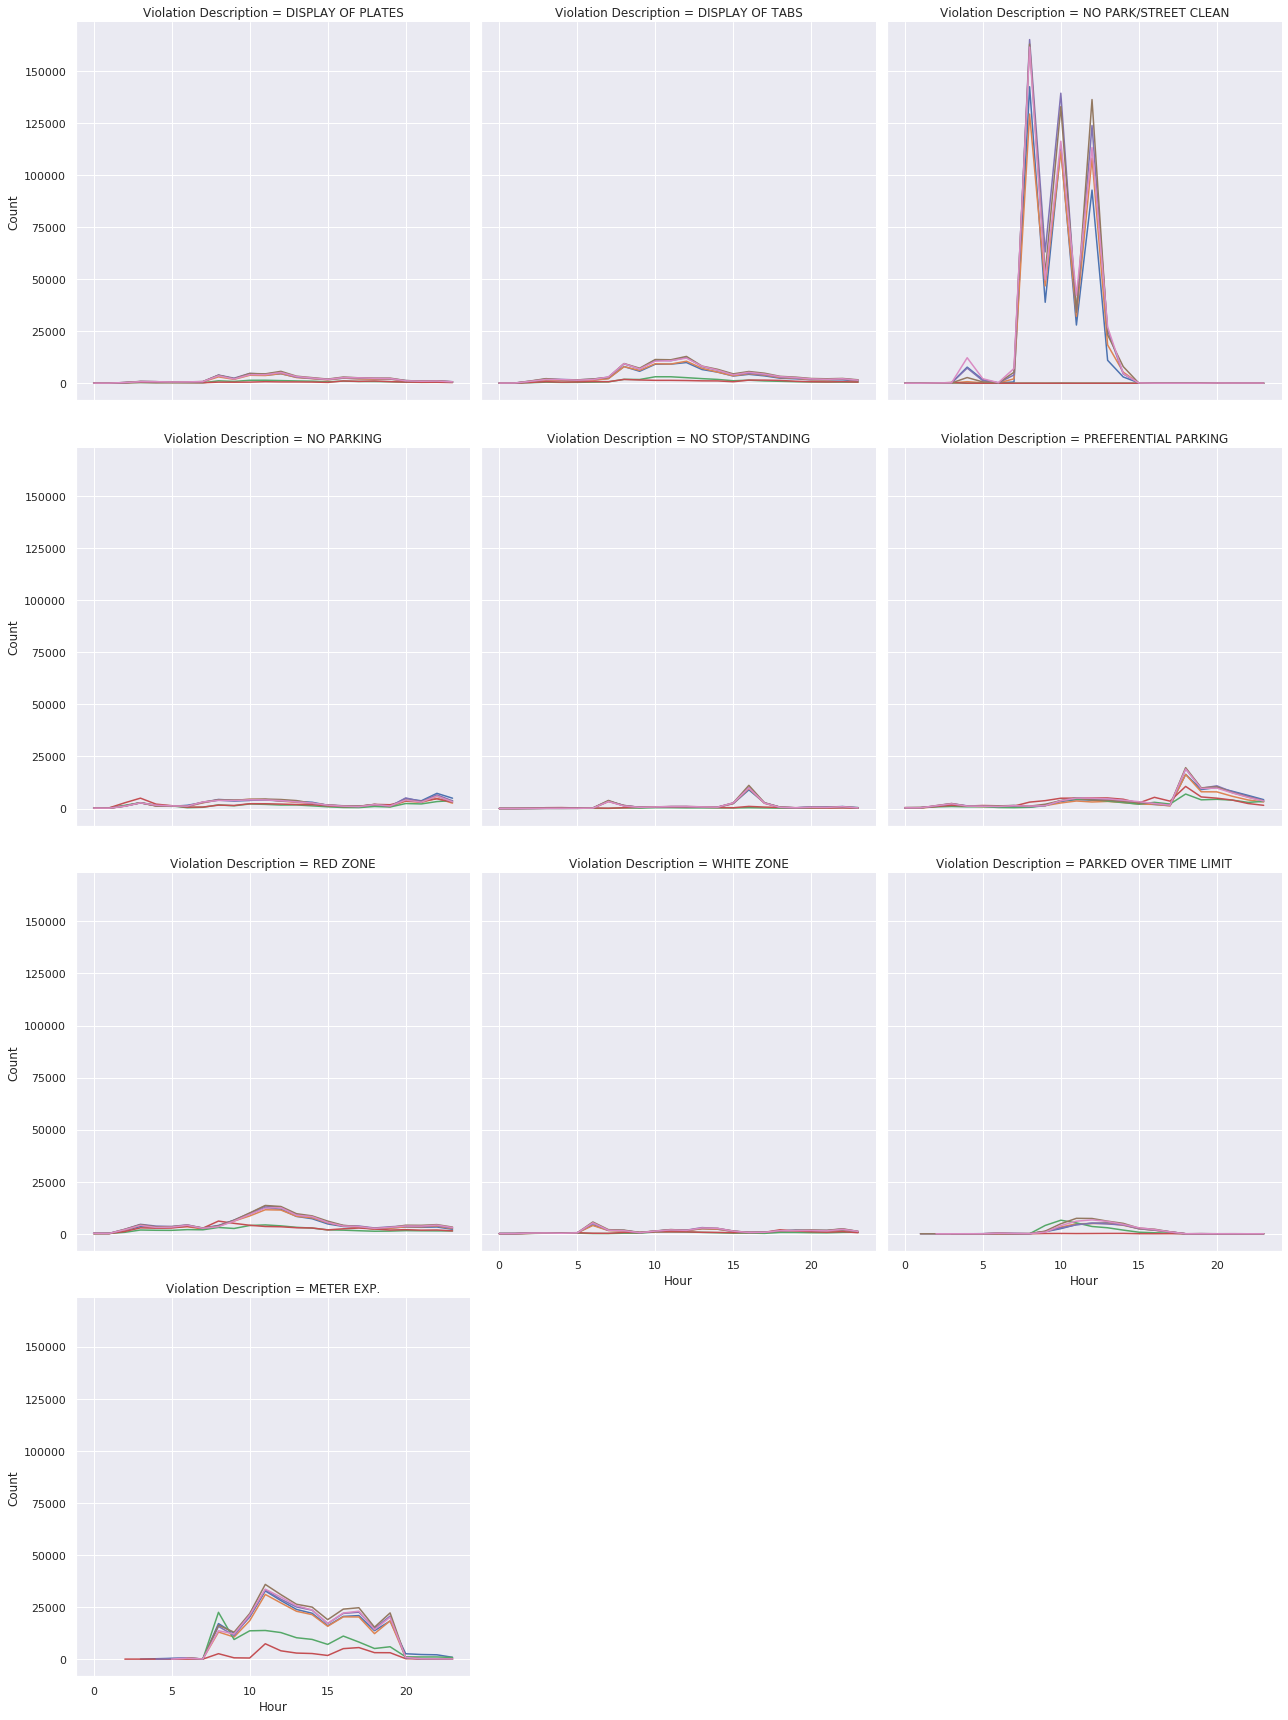

In [ ]:
grid = sns.FacetGrid(data= top_10_hour, hue='Weekday', col= 'Violation Description', col_wrap= 3, size=6)
grid.map(sns.lineplot, "Hour", "Count")